In [5]:
import pandas as pd
import numpy as np

In [6]:
"""Problemy zwiazane z zapisem danych w CSV:
1.Znaki specjalne jak przecinki czy znaki nowego wiersza rozbijają format
2.Liczby (na wyjściu) -> błędy zaokrągleń, formatu itp, wartośći wyuoczne w trakcie pracy modelu tracą dokładność.
Konkluzja -> CSV nie jest dobry na wyjście, kiedy zależy nam na zachowaniu dokładności"""

'Problemy zwiazane z zapisem danych w CSV:\n1.Znaki specjalne jak przecinki czy znaki nowego wiersza rozbijają format\n2.Liczby (na wyjściu) -> błędy zaokrągleń, formatu itp, wartośći wyuoczne w trakcie pracy modelu tracą dokładność.\nKonkluzja -> CSV nie jest dobry na wyjście, kiedy zależy nam na zachowaniu dokładności'

In [7]:
df = pd.read_csv("car_price.csv", index_col=0) # wskazanie kolumny pełniącej rolę indexu, jeżeli taka kolumna jest dostępna należy jej użyć!
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [8]:
df['CarName'] # są tu pewne problemy. np wiersz 4 i 5 to najprawdopodobniej ten sam obiekt w rzeczywistosc, 204 i 205 - czy wariant jest istotny?
                # lepiej stosowac podejscie reudukcjonistyczne - rozklad tych wartosci nie jest zbyt korzystny, lepiej odrzucic go z analizy

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [9]:
df['CarName'].describe()

count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object

In [10]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [11]:
df.drop(columns='CarName', inplace=True)

In [12]:
df.dtypes # int powinny byc niepokojace, poniewaz przestaje byc to cecha ciagla! moze byc teraz przetwarzana kombinatorycznie, ale nie statystcznie.
            # symbolling to tutaj rating bezpieczenstwa w stopniowanej skali, nie bedziemy wykonywac na nim obliczen (skala nominalna)
            # lepiej by bylo gdyby byly reprezentowane przez litery, bo nie da sie nawet stwierdzic o ile tak naprawde te liczby sie roznia.

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

##### Types of measurment scales:<hr>
1. Ratio Scale (skala ilorazowa)
- equal intervals between neighboring points
- zero on a ratio scale means total abcence of value (true zero)
- rank ordered
- examples are: length, area, population
- all arithmetic operations can be performed between values and be interpreted
- allows use of frequence, statistical measures and ranges
2. Interval Scale
- equal intervals between neighboring points
- zero means a value equal to 0
- rank ordered
- examples are: temperature, exam score
- no logical interpretation of division and multiplication
3. Ordinal Scale (skala porządkowa)
- categorical datatype
- rank ordered
- examples are:
    - income level (less than, between, more than)
    - satisfaction level (extremaly dislike - neutral - like)
- usually cannot establish the distance between points (ex. what is the distance between dislike and neutral and like and neutral)
- doesn't allow arithmetic operation
- should not be used in statistical equations(!)
- numbers should be treated as strings
4. Nominal Scale
- used only as categorical data
- cannot use values without aggregation to any operations
- no ranks
- examples are: fuel type - [gas, diesel]
- how to replace them with numerical values?
    - treat them as symbols, not text values (category type)


In [14]:
df['fueltype'].astype('category').cat.categories

Index(['diesel', 'gas'], dtype='object')

In [15]:
df['fueltype'].astype('category').cat.codes

car_ID
1      1
2      1
3      1
4      1
5      1
      ..
201    1
202    1
203    1
204    0
205    1
Length: 205, dtype: int8

In [16]:
df['fueltype'].astype('category').dtype
# every category is separate property (separate column)

CategoricalDtype(categories=['diesel', 'gas'], ordered=False)

In [17]:
pd.get_dummies(df['fueltype'].astype('category')) # make categories actual columns (1-of-n, one-hot-encoding)!

,diesel,gas
car_ID,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
201,0,1
202,0,1
203,0,1


In [21]:
df['carbody'].astype('category').dtype

CategoricalDtype(categories=['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], ordered=False)

In [22]:
pd.get_dummies(df['carbody'].astype('category'))
# oneHot variant - 1 true and rest 0 per row -> similar can be used in probability

,convertible,hardtop,hatchback,sedan,wagon
car_ID,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [23]:
pd.get_dummies(df['carbody'].astype('category'), drop_first=True) #  rzadko używane

,hardtop,hatchback,sedan,wagon
car_ID,,,,
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In [20]:
pd.get_dummies(df['carbody'].astype('category')).idxmax(axis='columns') # znajdz max w kazdym wierszu

car_ID
1      convertible
2      convertible
3        hatchback
4            sedan
5            sedan
          ...     
201          sedan
202          sedan
203          sedan
204          sedan
205          sedan
Length: 205, dtype: object

In [24]:
pd.get_dummies(df) # wszystkie nieliczbowe kolumny zamien na 0-1 cechy

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df['carbody'].value_counts() # to jest zawsze dylemat czy powinnisny robic ten oneHot, nie wiadomo czy wgl te cechy beda uzyte w modelu
                                # najpierw zajmij się ilorazowymi cechami, a potem kategorycznymi (de-facto przelacznikami)

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Exploratory analysis

In [26]:
keys = [key for key, column in df.items() if column.dtype == float] #  odrzucami wszystko co nie jest dana numeryczna (nie floatem)
keys

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

In [28]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [30]:
import matplotlib.pyplot as plt

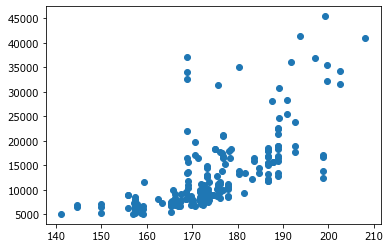

In [31]:
# is there any hope to find dependencies for model to learn
# słaba zależność liniowa! wraz z dlugoscia samochodu rosnie jego cena! moze to być progrem regeresyjny
plt.scatter(df['carlength'], df['price'])

In [ ]:
# there is a dependency between length and price! - maybe this is a regression problem
# decision -> what kind of line chart should we use? - this is not a straight line...

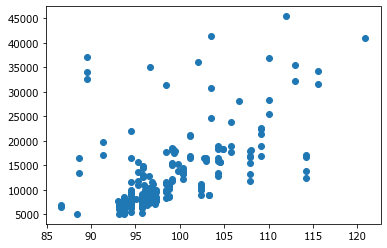

In [32]:
plt.scatter(df['wheelbase'], df['price']) #  maly rozształ na osi x (wheelbase), nie jest to zbyt dobra zmienna na wejsciu 
# 'columns' of dots can indicated that the value is quantified
# meaniung that they take constant values (in fact they are categorical)
# most probably this is not good value for our model
# model can have extrapolation issues

In [1]:
plt.subplots(4, 2, figsize=(10, 20)) 
for idx, key in enumerate(keys, 1):  #  idx bo trzeba podac numer plotu metodzie subplot
    plt.subplot(4, 2, idx, title=key)
    plt.scatter(df[key], df['price'])

NameError: name 'plt' is not defined

In [ ]:
# compression -> to nie jest problem regresyjny, przynajmniej w odniesieniu do tej zmiennej
# jezeli widzimy cos takiego to jest to raczej problem klasyfikacji lub klasteryzacyjnych w uczeniu nienadzworowanym
# czyli rozpozaniania tych grup
# czy jestesmy w stanie odkryc mozliwosc rozroznienia tych skupisk - zrobmy to okresleniem kolorystycznym

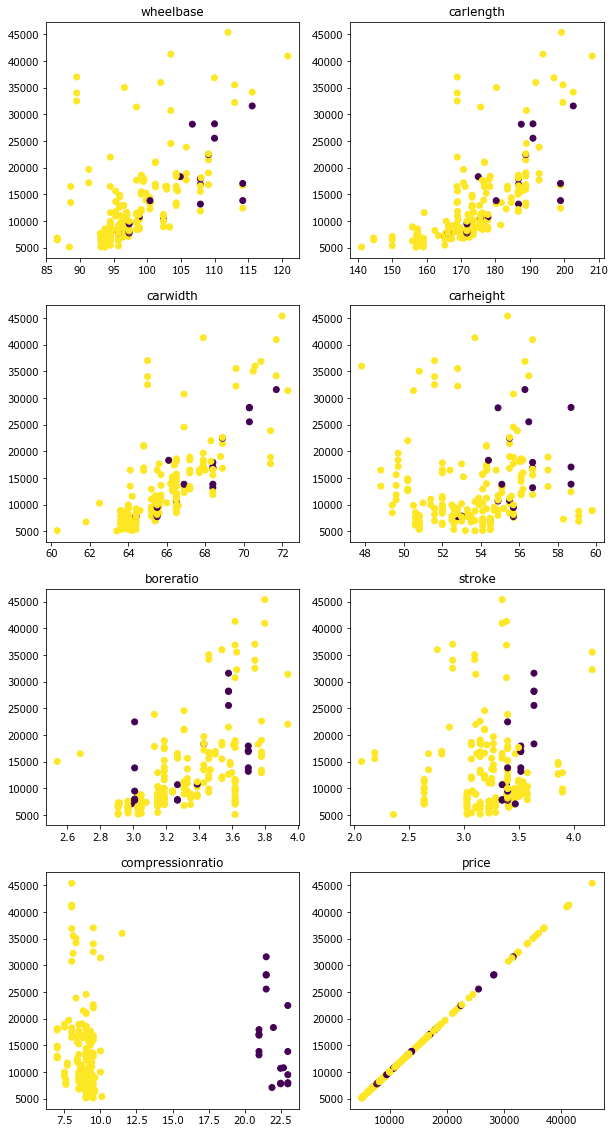

In [34]:
plt.subplots(4, 2, figsize=(10, 20))
for idx, key in enumerate(keys, 1):
    plt.subplot(4, 2, idx, title=key)
    plt.scatter(df[key], df['price'], c=df['fueltype'].astype('category').cat.codes) # c is color, use categorical type

In [35]:
# compression ratio has classification problem -> dot color solved it withoud model
# it also have a clasterization problem

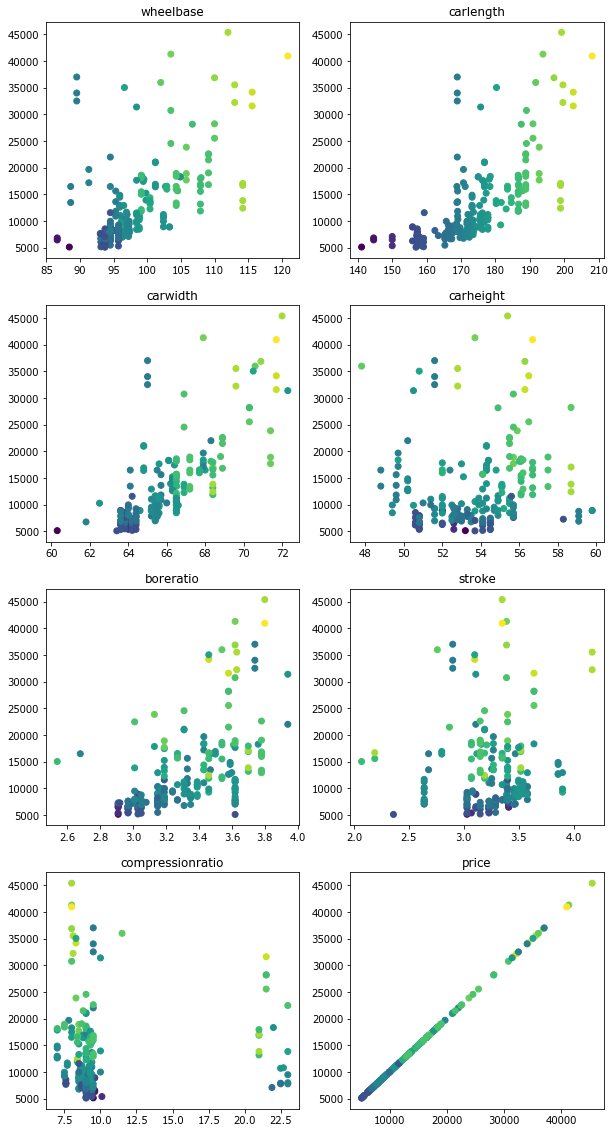

In [36]:
plt.subplots(4, 2, figsize=(10, 20))
for idx, key in enumerate(keys, 1):
    plt.subplot(4, 2, idx, title=key)
    plt.scatter(df[key], df['price'], c=df['carlength'])

Missing Values

In [37]:
# random missing vals, indexator
missing = np.random.random(len(df)) > 0.9
missing

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [38]:
df.loc[missing, 'horsepower'] = np.nan

In [39]:
df['horsepower']

car_ID
1      111.0
2      111.0
3      154.0
4      102.0
5      115.0
       ...  
201    114.0
202    160.0
203      NaN
204    106.0
205    114.0
Name: horsepower, Length: 205, dtype: float64

Missing numbers with NaN makes arithmetics wrong
what to put:
- not 0 because they will be outliers
- drop values!

In [40]:
df.dropna(axis='index')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-2,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,...,130,mpfi,3.62,3.15,7.5,162.0,5100,17,22,18420.0
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0


In [ ]:
# we can't allow model to eat NaN!!
# options: 
# column is important, but missing rows not. They are only makes analysis worse.
# throwing column may also not be a bad idea! 
# we can also treat column as nominal if there are NaNs -> statisticians are scared of this, but neural networks can cope
# add statistical value to fill value up---------------------->

In [41]:
df.loc[missing, 'horsepower'] = np.nan

In [42]:
df['horsepower'].groupby(df['fueltype']).mean()

fueltype
diesel     82.421053
gas       105.222892
Name: horsepower, dtype: float64

In [43]:
df['horsepower'].mean()

102.88108108108108

In [44]:
##### very different values! that's why we cant use genral mean

In [46]:
df['horsepower'].fillna(df['horsepower'].mean()).groupby(df['fueltype']).mean()

fueltype
diesel     83.444054
gas       104.982381
Name: horsepower, dtype: float64

In [47]:
pd.Series([2, 2, np.nan]).mean() # pandas doesnt take nan into consideration for it's tatistical functions

2.0

In [48]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,NaN,5500,18,23,21485.0
